In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import math
import scipy
import scipy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
import numba
from numba import jit, int32, int64, float32, float64
import timeit
import time
import pstats

from tsne.tsne import TSNE, TSNE_plot

In [12]:
# PCA function code
def pca(X):
    train = StandardScaler().fit_transform(X)
    out = PCA(n_components=50).fit_transform(train)
    return out

## Examples from Paper

### MNist Data

In [26]:
X = np.loadtxt("Data/mnist2500_X.txt")
labels = np.loadtxt("Data/mnist2500_labels.txt")

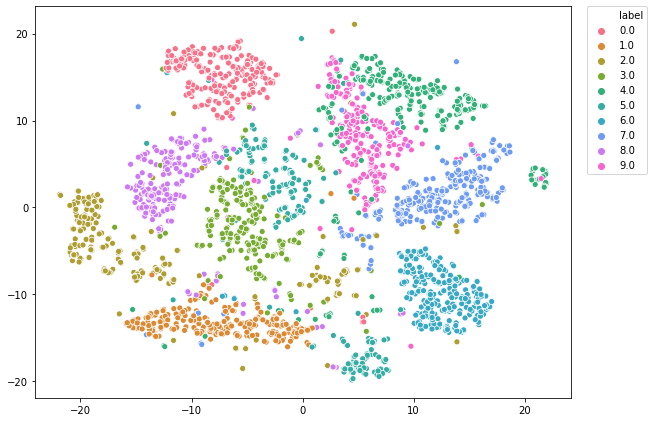

In [29]:
yout = TSNE(X)
TSNE_plot(yout, labels)

### Olivetti Faces Data

In [13]:
# Imports
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
import scipy.io

# Download Olivetti faces dataset
olivetti = fetch_olivetti_faces()

In [14]:
# initialize X by reducing to 50 dimensions using PCA
pca_olivetti = pca(olivetti.data)

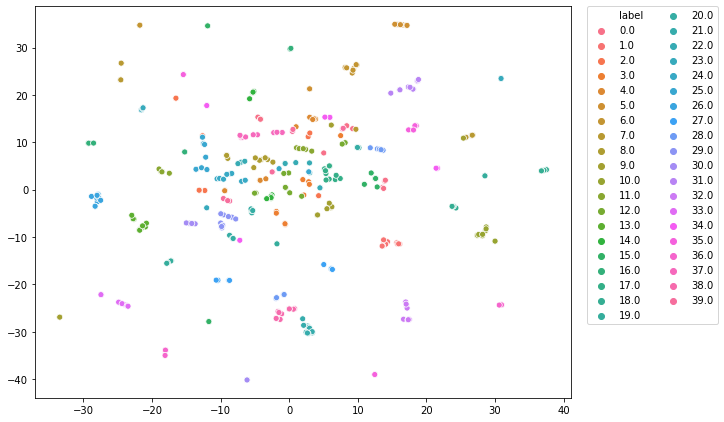

In [15]:
olivetti_out = TSNE(pca_olivetti)
TSNE_plot(olivetti_out, olivetti.target)

### Coil-20 Data

In [16]:
mat = scipy.io.loadmat("Data/COIL20.mat")
coil20 = mat['X']
coil20_labels = mat['Y'][:, 0]
pca_coil = pca(coil20)

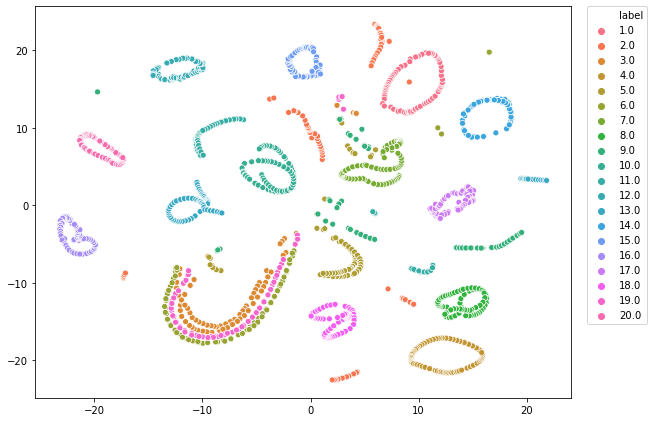

In [17]:
coil20_out = TSNE(pca_coil)
TSNE_plot(coil20_out, coil20_labels)

## Other Real Data Examples

### Iris Data

In [18]:
iris = sns.load_dataset('iris')
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
specs = np.array(iris['species'])

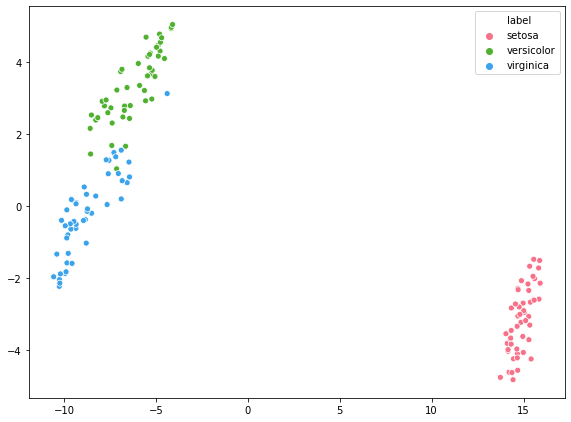

In [19]:
yout = TSNE(X)
TSNE_plot(yout, specs)

### Breast Cancer Data

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
X = breast_data
y = breast.target

X = StandardScaler().fit_transform(X)

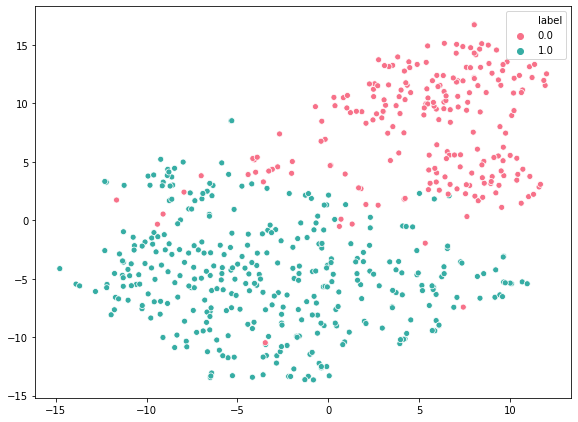

In [21]:
yout = TSNE(X)
TSNE_plot(yout, y)

### RNA Sequence Data

In [22]:
rna = pd.read_csv('Data/rna_data.csv')
X = np.array(rna.iloc[:, 1:]).astype(np.float)
y = pd.read_csv('Data/rna_labels.csv')
y = np.array(y).squeeze()
X = pca(X)

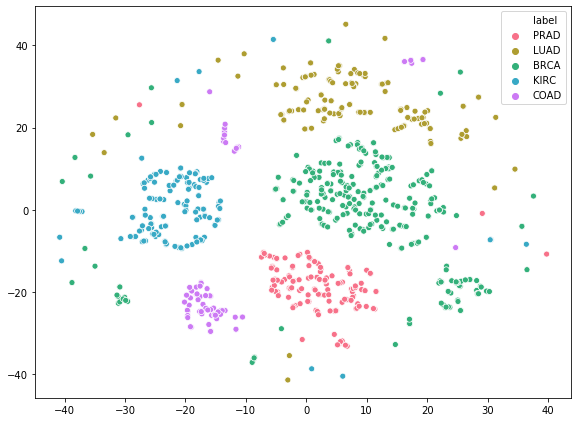

In [23]:
yout = TSNE(X)
TSNE_plot(yout, y)